___

## Leaf Data Analysis
# 182061
___


## Importing Libraries

In [186]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [310]:
import graphviz
import pydotplus
import scipy as sp
import numpy as np
import pandas as pd
import seaborn as sns
from six import StringIO
from sklearn import tree
import matplotlib.pyplot as plt
from keras.utils import np_utils
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score

#Importing classifiers
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## Importing Dataset

In [188]:
#df = pd.read_csv("dataset/leaf.csv")

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/leaf-classification/dataset/leaf.csv')

## Data Preparation

In [189]:
df.head()

,1,1.1,0.72694,1.4742,0.32396,0.98535,1.2,0.83592,0.0046566,0.0039465,0.04779,0.12795,0.016108,0.0052323,0.00027477,1.1756
0,1,2,0.74173,1.5257,0.36116,0.98152,0.99825,0.79867,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659
1,1,3,0.76722,1.5725,0.38998,0.97755,1.00000,0.80812,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348
2,1,4,0.73797,1.4597,0.35376,0.97566,1.00000,0.81697,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785
3,1,5,0.82301,1.7707,0.44462,0.97698,1.00000,0.75493,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000024,0.34214
4,1,6,0.72997,1.4892,0.34284,0.98755,1.00000,0.84482,0.004945,0.004451,0.010487,0.058528,0.003414,0.001125,0.000025,0.34068


In [190]:
columns = ['Species-(Class)', 'Specimen-Number', 'Eccentricity', 'Aspect-Ratio', 'Elongation', 'Solidity', 'Stochastic-Convexity', 'Isoperimetric-Factor', 'Maximal-Indentation-Depth', 'Lobedness', 'Average-Intensity', 'Average-Contrast', 'Smoothness', 'Third-moment', 'Uniformity', 'Entropy']

In [191]:
features = ['Eccentricity', 'Aspect-Ratio', 'Elongation', 'Solidity', 'Stochastic-Convexity', 'Isoperimetric-Factor', 'Maximal-Indentation-Depth', 'Lobedness', 'Average-Intensity', 'Average-Contrast', 'Smoothness', 'Third-moment', 'Uniformity', 'Entropy']

In [192]:
#leaf_dataset = pd.read_csv('dataset/leaf.csv', names=columns)

leaf_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/leaf-classification/dataset/leaf.csv', names=columns)

In [193]:
print(leaf_dataset.columns)

Index(['Species-(Class)', 'Specimen-Number', 'Eccentricity', 'Aspect-Ratio',
       'Elongation', 'Solidity', 'Stochastic-Convexity',
       'Isoperimetric-Factor', 'Maximal-Indentation-Depth', 'Lobedness',
       'Average-Intensity', 'Average-Contrast', 'Smoothness', 'Third-moment',
       'Uniformity', 'Entropy'],
      dtype='object')


In [194]:
leaf_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Species-(Class)            340 non-null    int64  
 1   Specimen-Number            340 non-null    int64  
 2   Eccentricity               340 non-null    float64
 3   Aspect-Ratio               340 non-null    float64
 4   Elongation                 340 non-null    float64
 5   Solidity                   340 non-null    float64
 6   Stochastic-Convexity       340 non-null    float64
 7   Isoperimetric-Factor       340 non-null    float64
 8   Maximal-Indentation-Depth  340 non-null    float64
 9   Lobedness                  340 non-null    float64
 10  Average-Intensity          340 non-null    float64
 11  Average-Contrast           340 non-null    float64
 12  Smoothness                 340 non-null    float64
 13  Third-moment               340 non-null    float64

In [195]:
leaf_dataset.head()

,Species-(Class),Specimen-Number,Eccentricity,Aspect-Ratio,Elongation,Solidity,Stochastic-Convexity,Isoperimetric-Factor,Maximal-Indentation-Depth,Lobedness,Average-Intensity,Average-Contrast,Smoothness,Third-moment,Uniformity,Entropy
0,1,1,0.72694,1.4742,0.32396,0.98535,1.00000,0.83592,0.004657,0.003947,0.047790,0.127950,0.016108,0.005232,0.000275,1.17560
1,1,2,0.74173,1.5257,0.36116,0.98152,0.99825,0.79867,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659
2,1,3,0.76722,1.5725,0.38998,0.97755,1.00000,0.80812,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348
3,1,4,0.73797,1.4597,0.35376,0.97566,1.00000,0.81697,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785
4,1,5,0.82301,1.7707,0.44462,0.97698,1.00000,0.75493,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000024,0.34214


## Data Preprocessing

Finding and filling missing values

In [196]:
print(leaf_dataset.isnull().any(axis=1))

0      False
1      False
2      False
3      False
4      False
       ...  
335    False
336    False
337    False
338    False
339    False
Length: 340, dtype: bool


In [197]:
print(leaf_dataset.isnull().sum(axis=1))

0      0
1      0
2      0
3      0
4      0
      ..
335    0
336    0
337    0
338    0
339    0
Length: 340, dtype: int64


In [198]:
X = leaf_dataset.iloc[:, 2:16].values
y = leaf_dataset.iloc[:, 0].values

In [199]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, :]) #Selecting and filling the missing values from all rows and all the coloumns in X array
X[:, :] = imputer.transform(X[:, :])

In [200]:
print(X)

[[7.2694e-01 1.4742e+00 3.2396e-01 ... 5.2323e-03 2.7477e-04 1.1756e+00]
 [7.4173e-01 1.5257e+00 3.6116e-01 ... 2.7080e-03 7.4846e-05 6.9659e-01]
 [7.6722e-01 1.5725e+00 3.8998e-01 ... 9.2068e-04 3.7886e-05 4.4348e-01]
 ...
 [3.5344e-01 1.0329e+00 7.8147e-01 ... 1.6123e-02 4.5288e-04 1.6935e+00]
 [5.9988e-01 1.1427e+00 7.1532e-01 ... 6.1900e-03 2.6454e-04 1.1526e+00]
 [4.7195e-01 1.0901e+00 8.5409e-01 ... 1.3487e-02 3.2855e-04 1.5623e+00]]


In [201]:
print(y)

[ 1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  3  3
  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5
  5  5  5  5  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8
  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9  9  9 10
 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11
 11 11 11 11 12 12 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13
 13 13 13 13 13 14 14 14 14 14 14 14 14 14 14 14 14 15 15 15 15 15 15 15
 15 15 15 22 22 22 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23
 23 23 24 24 24 24 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25
 26 26 26 26 26 26 26 26 26 26 26 26 27 27 27 27 27 27 27 27 27 27 27 28
 28 28 28 28 28 28 28 28 28 28 28 29 29 29 29 29 29 29 29 29 29 29 29 30
 30 30 30 30 30 30 30 30 30 30 30 31 31 31 31 31 31 31 31 31 31 31 32 32
 32 32 32 32 32 32 32 32 32 33 33 33 33 33 33 33 33 33 33 33 34 34 34 34
 34 34 34 34 34 34 34 35 35 35 35 35 35 35 35 35 35

Label Encoding

In [202]:
label_encode = LabelEncoder()
y = label_encode.fit_transform(y)

In [203]:
print(y)

[ 0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2
  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  4  4  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  8  8  8  8  9
  9  9  9  9  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12
 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14
 14 14 14 15 15 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16 16
 16 16 17 17 17 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18
 19 19 19 19 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 20 21
 21 21 21 21 21 21 21 21 21 21 21 22 22 22 22 22 22 22 22 22 22 22 22 23
 23 23 23 23 23 23 23 23 23 23 23 24 24 24 24 24 24 24 24 24 24 24 25 25
 25 25 25 25 25 25 25 25 25 26 26 26 26 26 26 26 26 26 26 26 27 27 27 27
 27 27 27 27 27 27 27 28 28 28 28 28 28 28 28 28 28

In [204]:
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29']

Splitting the dataset into training set and test set

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [206]:
print(X_train)

[[8.7163e-01 2.0659e+00 5.5339e-01 ... 6.6921e-03 1.6133e-04 1.4016e+00]
 [3.9092e-01 1.0870e+00 6.8174e-01 ... 2.1177e-03 2.1044e-04 9.0082e-01]
 [7.7982e-01 1.6215e+00 3.9222e-01 ... 2.4664e-03 1.4676e-04 6.6975e-01]
 ...
 [3.8564e-01 1.0471e+00 2.3328e-01 ... 2.2000e-02 8.6835e-04 1.9757e+00]
 [4.9634e-01 1.1832e+00 2.2855e-01 ... 5.1731e-03 2.3865e-04 1.1489e+00]
 [2.3041e-01 1.1294e+00 2.5496e-01 ... 2.4180e-02 4.2353e-04 1.6648e+00]]


In [207]:
print(X_test)

[[9.9593e-01 1.0120e+01 9.2461e-01 8.0662e-01 9.0702e-01 1.5053e-01
  1.2257e-01 2.7342e+00 8.2902e-03 5.2333e-02 2.7313e-03 9.0459e-04
  1.5362e-05 2.7303e-01]
 [5.0692e-01 1.1270e+00 6.7203e-01 5.3024e-01 7.5263e-01 1.6792e-01
  1.3006e-01 3.0788e+00 1.5279e-02 5.7592e-02 3.3059e-03 7.2847e-04
  1.0983e-04 6.7289e-01]
 [2.4465e-01 1.0470e+00 6.0511e-01 5.6524e-01 7.9474e-01 2.1788e-01
  1.2522e-01 2.8540e+00 3.7595e-02 1.2700e-01 1.5874e-02 6.5870e-03
  1.0798e-04 8.3310e-01]
 [8.6545e-01 1.8803e+00 6.2039e-01 8.2443e-01 8.5439e-01 3.3077e-01
  4.7000e-02 4.0204e-01 3.9518e-02 1.1570e-01 1.3210e-02 4.2406e-03
  2.0084e-04 1.0136e+00]
 [8.2866e-01 1.9848e+00 5.0917e-01 9.4180e-01 9.9825e-01 5.5942e-01
  2.5524e-02 1.1857e-01 8.0103e-02 1.6692e-01 2.7107e-02 8.6548e-03
  4.2650e-04 1.8038e+00]
 [7.2719e-01 1.4779e+00 3.2980e-01 9.9388e-01 1.0000e+00 8.4230e-01
  2.9668e-03 1.6019e-03 2.6340e-02 8.1903e-02 6.6634e-03 1.7846e-03
  1.9390e-04 9.8050e-01]
 [9.6652e-01 3.8162e+00 7.4273e-01

In [208]:
print(y_train)

[ 6 10  0 12 28 26 26  7 12 17 22  6  9 23  8 17 12  1  2 24 12 19 21 23
 18 21 13 18  1 17  7 28  1 12 28  2 21 20 14 21 12 15  5 10 11  1  0 26
 19  8  2  2 25 26  5 16  0 20 21  8 28 17 20 14 19 15  8  6 20  9 24  9
 15  6  2  3 10  6 23 13 11 12 17  8 25 21 25 13 22 14 20 26 22 11  3 22
 20 15 10 23 19 10 27 28 21 26 14 17 19 13 19  0 10 16 19 10 22 25 11  7
  2  8 24  9 16 24 11 16 21  4 27  6 22  8 16  7 13  1  3  2 14 12 21 11
 24  4  9 22 15 17 10  4  8 23 17 12  2 29 12 24  0  0 26 25 28  9 19 16
 25 19 18  9 15  9  3 18  6 13  4  3 24  0 29 17 26  2 23 21 20 14 25 12
  6 11 11  0  6  1 13  4 27 28 19 25 20 18 18 27 22 29 27 23 17 14  4 19
 16 22  9  5  0  4  7 17  3 23  8  5 23 21  1  8 23 14 29 11 28 21  5  4
 15 16 29 16 14  5  4 20 22  1 27 13 24 16 25 22 27 13 11 13  9  8 29 18
 10 29  1 16  7  9 23  9]


In [209]:
print(y_test)

[24 10 10  4 11 20 15 24 29  2 11 19 22 13 10 15 10 28 23  0 24  5 14 10
 12  8 10 18 12 27 15  3  9 27  7  0 26 28 10  7  8  0 13 20  4 27 25 25
  7  3 28 15 17  8  6 17  5 29 29  4 26 26 27 15 18  7  7  1]


Feature scaling

In [210]:
sc = StandardScaler()
X_train[:, :] = sc.fit_transform(X_train[:, :])
X_test[:, :] = sc.transform(X_test[:, :])

In [211]:
print(X_train)

[[ 0.76163594 -0.09999249  0.28756748 ...  0.12964517 -0.54447525
   0.34892358]
 [-1.54720948 -0.48953753  0.96697955 ... -0.75242946 -0.43518234
  -0.48890675]
 [ 0.32067341 -0.27683774 -0.56557506 ... -0.68519017 -0.57690037
  -0.87549857]
 ...
 [-1.57256927 -0.5054154  -1.40691323 ...  3.08144437  1.02897767
   1.30942198]
 [-1.04087825 -0.45125555 -1.43195117 ... -0.1632613  -0.37240178
  -0.07385633]
 [-2.31813743 -0.47266481 -1.29215162 ...  3.50181047  0.0390434
   0.78927052]]


In [212]:
print(X_test)

[[ 1.35864762e+00  3.10506906e+00  2.25259553e+00 -9.70838256e-01
  -3.76868278e-01 -1.89570817e+00  2.37951287e+00  2.26641625e+00
  -1.22313269e+00 -1.42133641e+00 -1.12200236e+00 -9.86351627e-01
  -8.69322882e-01 -1.53923124e+00]
 [-9.90062617e-01 -4.73619866e-01  9.15580323e-01 -3.55530582e+00
  -1.77293671e+00 -1.81221115e+00  2.58400054e+00  2.61172239e+00
  -1.03112097e+00 -1.32002515e+00 -1.07996110e+00 -1.02031258e+00
  -6.59087033e-01 -8.70245192e-01]
 [-2.24974285e+00 -5.05455195e-01  5.61343812e-01 -3.22801598e+00
  -1.39215789e+00 -1.57233126e+00  2.45186165e+00  2.38646174e+00
  -4.18006607e-01  1.70753024e-02 -1.60401773e-01  1.09378897e-01
  -6.63204155e-01 -6.02205740e-01]
 [ 7.31953456e-01 -1.73850449e-01  6.42227463e-01 -8.04294486e-01
  -8.52773983e-01 -1.03029681e+00  3.16344225e-01 -7.05226962e-02
  -3.65173710e-01 -2.00611926e-01 -3.55316362e-01 -3.43073865e-01
  -4.56546865e-01 -3.00220090e-01]
 [ 5.55251447e-01 -1.32265551e-01  5.34918880e-02  2.93248598e-01
  

## Training the Dataset with Different Classifiers

**Decision Tree classifier**

Training with default parameters

In [213]:
dtclf1 = DecisionTreeClassifier() # Gini as default criterion

In [214]:
dtclf1.fit(X_train, y_train)

DecisionTreeClassifier()

In [215]:
dtclf1_y_pred = dtclf1.predict(X_test)

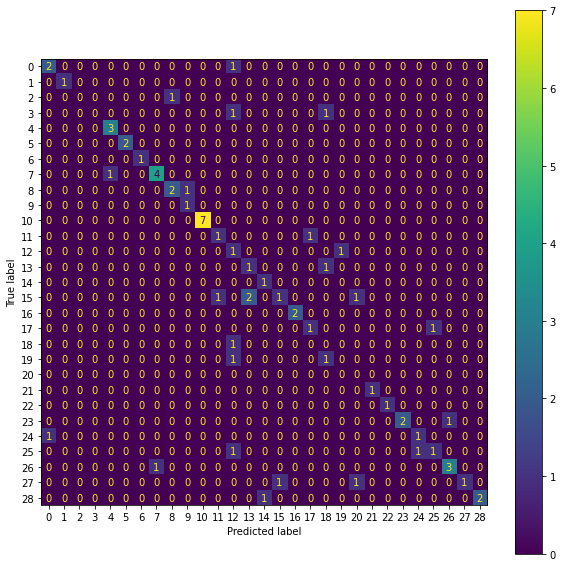

In [216]:
dtclf1_cm = confusion_matrix(y_test, dtclf1_y_pred)
plt.rcParams['figure.figsize'] = [10, 10]
dtclf1_cm_display = ConfusionMatrixDisplay(confusion_matrix = dtclf1_cm, display_labels=classes)

dtclf1_cm_display.plot()

In [217]:
dtclf1_acc_score = accuracy_score(y_test, dtclf1_y_pred)

print("Accuracy: {:.2f}%".format(dtclf1_acc_score * 100))

Accuracy: 63.24%


In [218]:
print(classification_report(y_test, dtclf1_y_pred))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.75      1.00      0.86         3
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         1
           7       0.80      0.80      0.80         5
           8       0.67      0.67      0.67         3
           9       0.50      1.00      0.67         1
          10       1.00      1.00      1.00         7
          11       0.50      0.50      0.50         2
          12       0.17      0.50      0.25         2
          13       0.33      0.50      0.40         2
          14       0.50      1.00      0.67         1
          15       0.50      0.20      0.29         5
          17       1.00      1.00      1.00         2
          18       0.50    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1

In [299]:
def get_metrics(y_test, dtclf1_y_pred):
    accuracy = accuracy_score(y_test, dtclf1_y_pred)
    precision = precision_score(y_test, dtclf1_y_pred, average='weighted')
    recall = recall_score(y_test, dtclf1_y_pred, average='weighted')
    f1 = f1_score(y_test, dtclf1_y_pred, average='weighted')
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, dtclf1_y_pred)

print("accuracy = %.2f%% \nprecision = %.2f%% \nrecall = %.2f%% \nf1 = %.2f%%" % (accuracy * 100, precision * 100, recall * 100, f1 * 100))

accuracy = 63.24% 
precision = 68.01% 
recall = 63.24% 
f1 = 63.43%


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


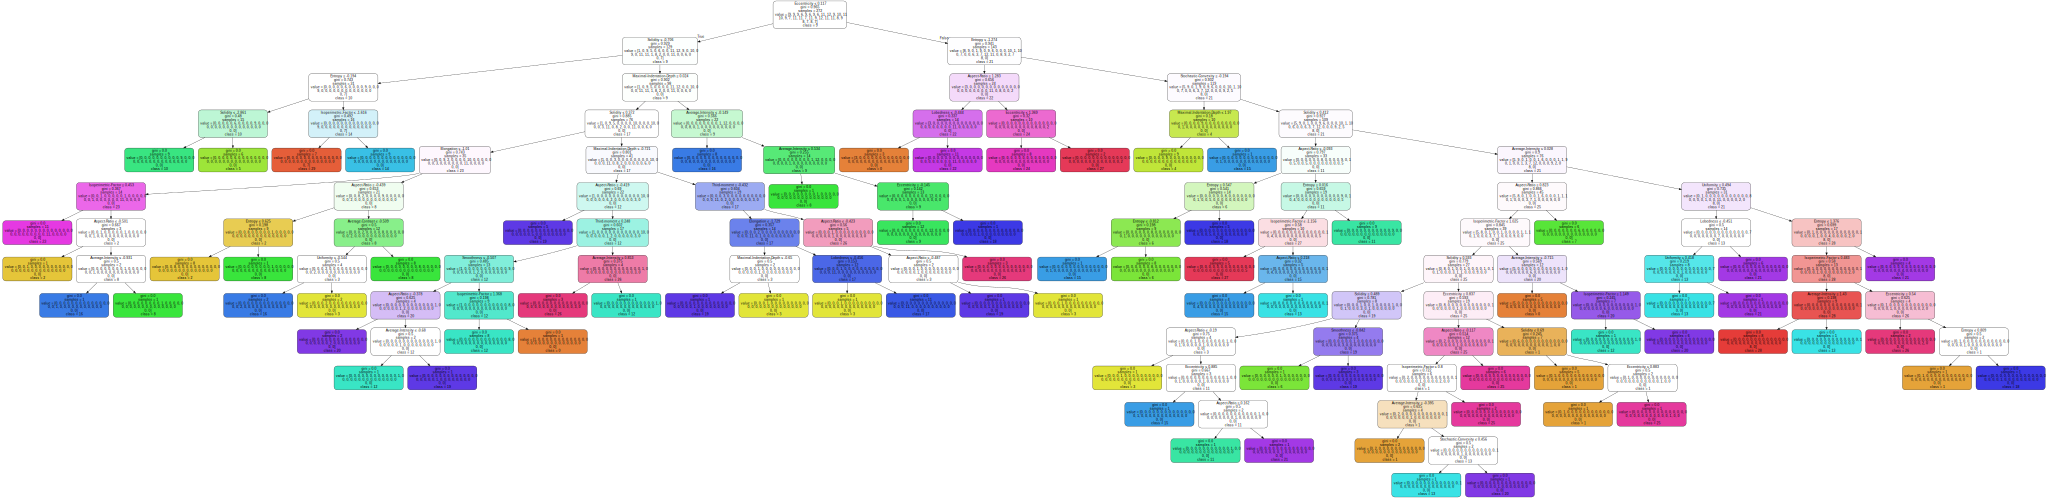

In [220]:
dot_data = tree.export_graphviz(dtclf1,
                                out_file=None,
                                filled=True,
                                rounded=True,
                                special_characters=True,
                                feature_names = features,
                                class_names = classes)

dtclf1_graph = graphviz.Source(dot_data)
dtclf1_graph

Changed parameters

In [221]:
dtclf2 = DecisionTreeClassifier(criterion='entropy', random_state=42)

In [222]:
dtclf2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [223]:
dtclf2_y_pred = dtclf2.predict(X_test)

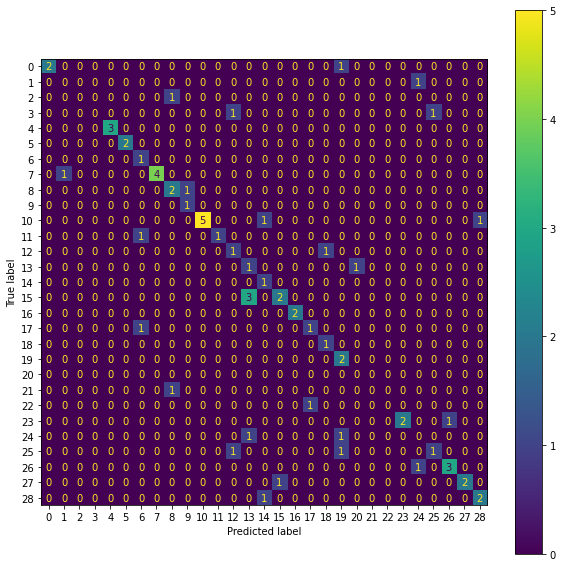

In [224]:
dtclf2_cm = confusion_matrix(y_test, dtclf2_y_pred)
plt.rcParams['figure.figsize'] = [10, 10]
dtclf2_cm_display = ConfusionMatrixDisplay(confusion_matrix = dtclf2_cm, display_labels=classes)

dtclf2_cm_display.plot()

In [225]:
dtclf2_acc_score = accuracy_score(y_test, dtclf2_y_pred)

print("Accuracy: {:.2f}%".format(dtclf2_acc_score * 100))

Accuracy: 61.76%


In [226]:
print(classification_report(y_test, dtclf2_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         2
           6       0.33      1.00      0.50         1
           7       1.00      0.80      0.89         5
           8       0.50      0.67      0.57         3
           9       0.50      1.00      0.67         1
          10       1.00      0.71      0.83         7
          11       1.00      0.50      0.67         2
          12       0.33      0.50      0.40         2
          13       0.20      0.50      0.29         2
          14       0.33      1.00      0.50         1
          15       0.67      0.40      0.50         5
          17       1.00      1.00      1.00         2
          18       0.50    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1

In [300]:
def get_metrics(y_test, dtclf2_y_pred):
    accuracy = accuracy_score(y_test, dtclf2_y_pred)
    precision = precision_score(y_test, dtclf2_y_pred, average='weighted')
    recall = recall_score(y_test, dtclf2_y_pred, average='weighted')
    f1 = f1_score(y_test, dtclf2_y_pred, average='weighted')
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, dtclf1_y_pred)

print("accuracy = %.2f%% \nprecision = %.2f%% \nrecall = %.2f%% \nf1 = %.2f%%" % (accuracy * 100, precision * 100, recall * 100, f1 * 100))

accuracy = 63.24% 
precision = 68.01% 
recall = 63.24% 
f1 = 63.43%


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


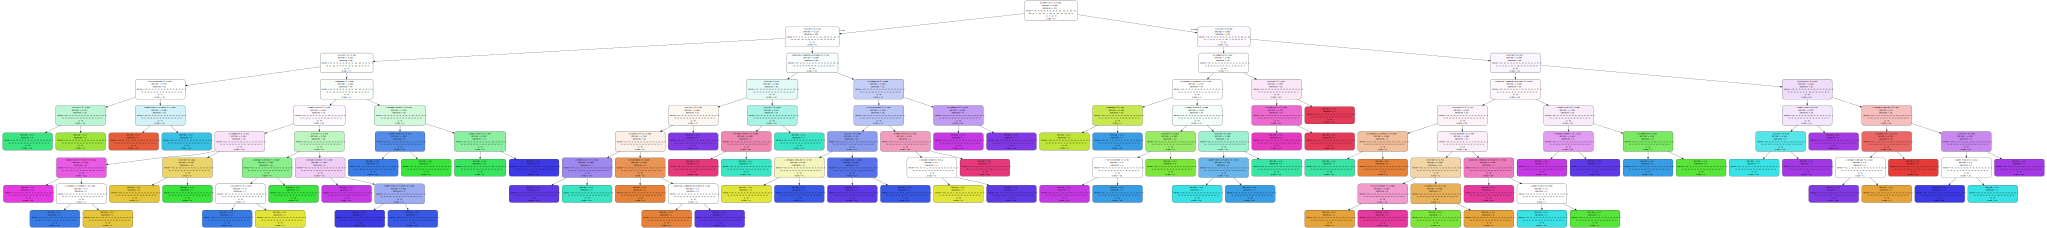

In [228]:
dot_data = tree.export_graphviz(dtclf2,
                                out_file=None,
                                filled=True,
                                rounded=True,
                                special_characters=True,
                                feature_names = features,
                                class_names = classes)

dtclf2_graph = graphviz.Source(dot_data)
dtclf2_graph

**KNN classifier**

Training with default parameters

In [229]:
knnclf1 = KNeighborsClassifier()

In [230]:
knnclf1.fit(X_train, y_train)

KNeighborsClassifier()

In [231]:
knnclf1_y_pred = knnclf1.predict(X_test)

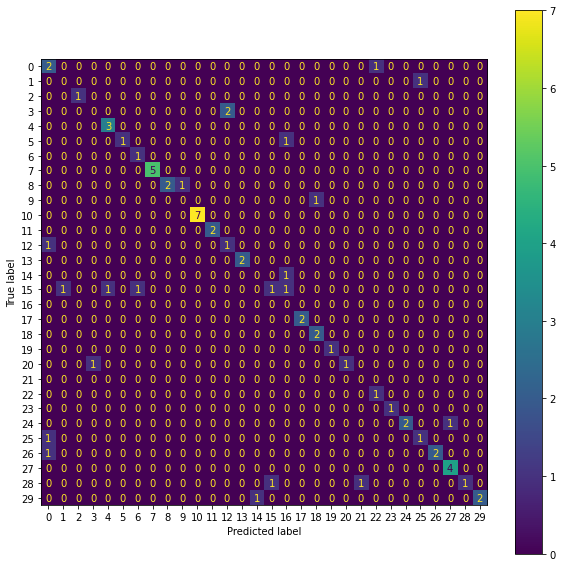

In [232]:
knnclf1_cm = confusion_matrix(y_test, knnclf1_y_pred)

knnclf1_cm = confusion_matrix(y_test, knnclf1_y_pred)
plt.rcParams['figure.figsize'] = [10, 10]
knnclf1_cm_display = ConfusionMatrixDisplay(confusion_matrix = knnclf1_cm, display_labels=classes)

knnclf1_cm_display.plot()

In [233]:
knnclf1_acc_score = accuracy_score(y_test, knnclf1_y_pred)

print("Accuracy: {:.2f}%".format(knnclf1_acc_score * 100))

Accuracy: 70.59%


In [234]:
print(classification_report(y_test, knnclf1_y_pred))

              precision    recall  f1-score   support

           0       0.40      0.67      0.50         3
           1       0.00      0.00      0.00         1
           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         2
           4       0.75      1.00      0.86         3
           5       1.00      0.50      0.67         2
           6       0.50      1.00      0.67         1
           7       1.00      1.00      1.00         5
           8       1.00      0.67      0.80         3
           9       0.00      0.00      0.00         1
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         2
          12       0.33      0.50      0.40         2
          13       1.00      1.00      1.00         2
          14       0.00      0.00      0.00         1
          15       0.50      0.20      0.29         5
          16       0.00      0.00      0.00         0
          17       1.00    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [301]:
def get_metrics(y_test, knnclf1_y_pred):
    accuracy = accuracy_score(y_test, knnclf1_y_pred)
    precision = precision_score(y_test, knnclf1_y_pred, average='weighted')
    recall = recall_score(y_test, knnclf1_y_pred, average='weighted')
    f1 = f1_score(y_test, knnclf1_y_pred, average='weighted')
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, knnclf1_y_pred)

print("accuracy = %.2f%% \nprecision = %.2f%% \nrecall = %.2f%% \nf1 = %.2f%%" % (accuracy * 100, precision * 100, recall * 100, f1 * 100))

accuracy = 70.59% 
precision = 78.16% 
recall = 70.59% 
f1 = 71.41%


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Changed parameters

In [235]:
knnclf2 = KNeighborsClassifier(n_neighbors=10, weights='distance', metric='minkowski', p=1)

In [236]:
knnclf2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10, p=1, weights='distance')

In [237]:
knnclf2_y_pred = knnclf2.predict(X_test)

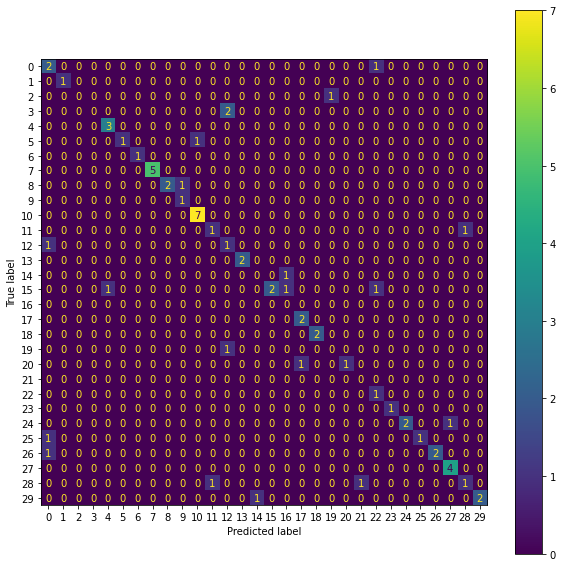

In [266]:
knnclf2_cm = confusion_matrix(y_test, knnclf2_y_pred)

knnclf2_cm = confusion_matrix(y_test, knnclf2_y_pred)
plt.rcParams['figure.figsize'] = [10, 10]
knnclf2_cm_display = ConfusionMatrixDisplay(confusion_matrix = knnclf2_cm, display_labels=classes)

knnclf2_cm_display.plot()

In [239]:
knnclf2_acc_score = accuracy_score(y_test, knnclf2_y_pred)

print("Accuracy: {:.2f}%".format(knnclf2_acc_score * 100))

Accuracy: 70.59%


In [240]:
print(classification_report(y_test, knnclf2_y_pred))

              precision    recall  f1-score   support

           0       0.40      0.67      0.50         3
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.75      1.00      0.86         3
           5       1.00      0.50      0.67         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         5
           8       1.00      0.67      0.80         3
           9       0.50      1.00      0.67         1
          10       0.88      1.00      0.93         7
          11       0.50      0.50      0.50         2
          12       0.25      0.50      0.33         2
          13       1.00      1.00      1.00         2
          14       0.00      0.00      0.00         1
          15       1.00      0.40      0.57         5
          16       0.00      0.00      0.00         0
          17       0.67    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1

In [302]:
def get_metrics(y_test, knnclf2_y_pred):
    accuracy = accuracy_score(y_test, knnclf2_y_pred)
    precision = precision_score(y_test, knnclf2_y_pred, average='weighted')
    recall = recall_score(y_test, knnclf2_y_pred, average='weighted')
    f1 = f1_score(y_test, knnclf2_y_pred, average='weighted')
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, knnclf2_y_pred)

print("accuracy = %.2f%% \nprecision = %.2f%% \nrecall = %.2f%% \nf1 = %.2f%%" % (accuracy * 100, precision * 100, recall * 100, f1 * 100))

accuracy = 70.59% 
precision = 77.86% 
recall = 70.59% 
f1 = 70.96%


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Linear Discriminant Analysis (LDA)**

Training with default parameters

In [241]:
ldaclf = LinearDiscriminantAnalysis()

In [242]:
ldaclf.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [243]:
ldaclf_y_pred = ldaclf.predict(X_test)

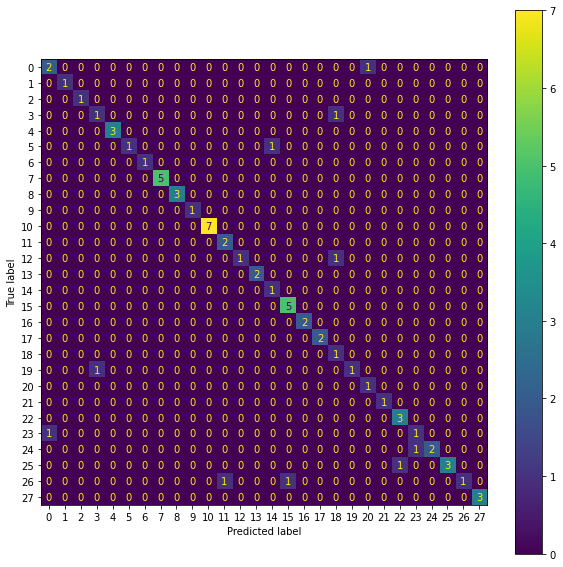

In [268]:
ldaclf_cm = confusion_matrix(y_test, ldaclf_y_pred)

ldaclf_cm = confusion_matrix(y_test, ldaclf_y_pred)
plt.rcParams['figure.figsize'] = [10, 10]
ldaclf_cm_display = ConfusionMatrixDisplay(confusion_matrix = ldaclf_cm, display_labels=classes)

ldaclf_cm_display.plot()

In [245]:
ldaclf_acc_score = accuracy_score(y_test, ldaclf_y_pred)

print("Accuracy: {:.2f}%".format(ldaclf_acc_score * 100))

Accuracy: 85.29%


In [246]:
print(classification_report(y_test, ldaclf_y_pred))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       0.50      0.50      0.50         2
           4       1.00      1.00      1.00         3
           5       1.00      0.50      0.67         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         7
          11       0.67      1.00      0.80         2
          12       1.00      0.50      0.67         2
          13       1.00      1.00      1.00         2
          14       0.50      1.00      0.67         1
          15       0.83      1.00      0.91         5
          17       1.00      1.00      1.00         2
          18       1.00    

In [304]:
def get_metrics(y_test, ldaclf_y_pred):
    accuracy = accuracy_score(y_test, ldaclf_y_pred)
    precision = precision_score(y_test, ldaclf_y_pred, average='weighted')
    recall = recall_score(y_test, ldaclf_y_pred, average='weighted')
    f1 = f1_score(y_test, ldaclf_y_pred, average='weighted')
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, ldaclf_y_pred)

print("accuracy = %.2f%% \nprecision = %.2f%% \nrecall = %.2f%% \nf1 = %.2f%%" % (accuracy * 100, precision * 100, recall * 100, f1 * 100))

accuracy = 85.29% 
precision = 89.83% 
recall = 85.29% 
f1 = 85.12%


**Logistic Regression**

Training with default parameters

In [247]:
lrclf = LogisticRegression()

In [248]:
lrclf.fit(X_train, y_train)

LogisticRegression()

In [249]:
lrclf_y_pred = lrclf.predict(X_test)

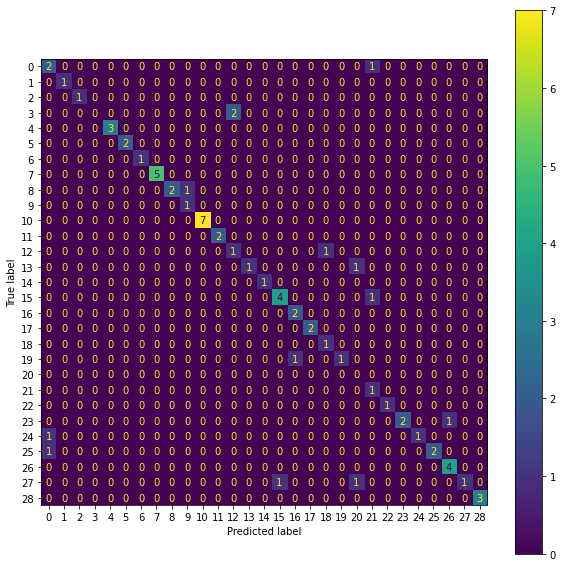

In [270]:
lrclf_cm = confusion_matrix(y_test, lrclf_y_pred)

lrclf_cm = confusion_matrix(y_test, lrclf_y_pred)
plt.rcParams['figure.figsize'] = [10, 10]
lrclf_cm_display = ConfusionMatrixDisplay(confusion_matrix = lrclf_cm, display_labels=classes)

lrclf_cm_display.plot()

In [251]:
lrclf_acc_score = accuracy_score(y_test, lrclf_y_pred)

print("Accuracy: {:.2f}%".format(lrclf_acc_score * 100))

Accuracy: 80.88%


In [252]:
print(classification_report(y_test, lrclf_y_pred))

              precision    recall  f1-score   support

           0       0.50      0.67      0.57         3
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         2
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         5
           8       1.00      0.67      0.80         3
           9       0.50      1.00      0.67         1
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         2
          12       0.33      0.50      0.40         2
          13       1.00      0.50      0.67         2
          14       1.00      1.00      1.00         1
          15       0.80      0.80      0.80         5
          17       0.67      1.00      0.80         2
          18       1.00    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1

In [305]:
def get_metrics(y_test, lrclf_y_pred):
    accuracy = accuracy_score(y_test, lrclf_y_pred)
    precision = precision_score(y_test, lrclf_y_pred, average='weighted')
    recall = recall_score(y_test, lrclf_y_pred, average='weighted')
    f1 = f1_score(y_test, lrclf_y_pred, average='weighted')
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, lrclf_y_pred)

print("accuracy = %.2f%% \nprecision = %.2f%% \nrecall = %.2f%% \nf1 = %.2f%%" % (accuracy * 100, precision * 100, recall * 100, f1 * 100))

accuracy = 80.88% 
precision = 86.81% 
recall = 80.88% 
f1 = 81.18%


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Naive Bayes classifier**

Training with default parameters

In [253]:
nbclf = GaussianNB()

In [254]:
nbclf.fit(X_train, y_train)

GaussianNB()

In [255]:
nbclf_y_pred = nbclf.predict(X_test)

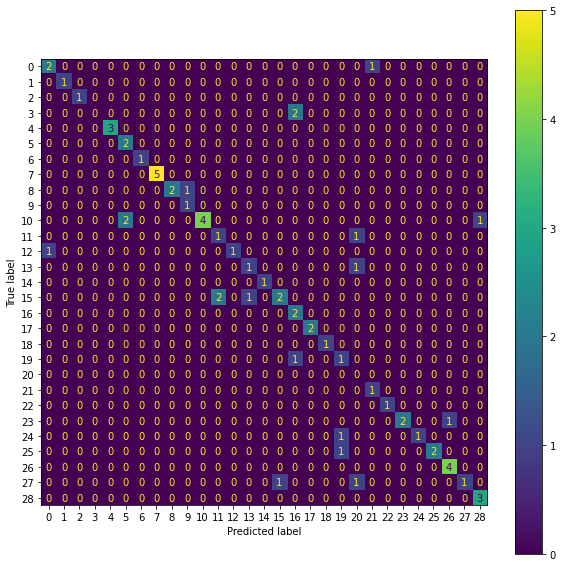

In [272]:
nbclf_cm = confusion_matrix(y_test, nbclf_y_pred)

nbclf_cm = confusion_matrix(y_test, nbclf_y_pred)
plt.rcParams['figure.figsize'] = [10, 10]
nbclf_cm_display = ConfusionMatrixDisplay(confusion_matrix = nbclf_cm, display_labels=classes)

nbclf_cm_display.plot()

In [257]:
nbclf_acc_score = accuracy_score(y_test, nbclf_y_pred)

print("Accuracy: {:.2f}%".format(nbclf_acc_score * 100))

Accuracy: 72.06%


In [258]:
print(classification_report(y_test, nbclf_y_pred))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         2
           4       1.00      1.00      1.00         3
           5       0.50      1.00      0.67         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         5
           8       1.00      0.67      0.80         3
           9       0.50      1.00      0.67         1
          10       1.00      0.57      0.73         7
          11       0.33      0.50      0.40         2
          12       1.00      0.50      0.67         2
          13       0.50      0.50      0.50         2
          14       1.00      1.00      1.00         1
          15       0.67      0.40      0.50         5
          17       0.40      1.00      0.57         2
          18       1.00    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1

In [306]:
def get_metrics(y_test, nbclf_y_pred):
    accuracy = accuracy_score(y_test, nbclf_y_pred)
    precision = precision_score(y_test, nbclf_y_pred, average='weighted')
    recall = recall_score(y_test, nbclf_y_pred, average='weighted')
    f1 = f1_score(y_test, nbclf_y_pred, average='weighted')
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, nbclf_y_pred)

print("accuracy = %.2f%% \nprecision = %.2f%% \nrecall = %.2f%% \nf1 = %.2f%%" % (accuracy * 100, precision * 100, recall * 100, f1 * 100))

accuracy = 72.06% 
precision = 80.76% 
recall = 72.06% 
f1 = 72.79%


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Support Vector Machine (SVM)**

Training with default parameters

In [259]:
svmclf = SVC()

In [260]:
svmclf.fit(X_train, y_train)

SVC()

In [261]:
svmclf_y_pred = svmclf.predict(X_test)

Confusion Matrix

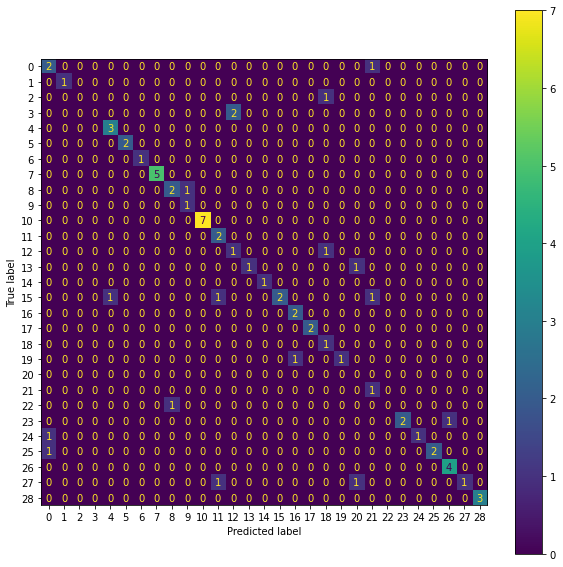

In [274]:
svmclf_cm = confusion_matrix(y_test, svmclf_y_pred)

svmclf_cm = confusion_matrix(y_test, svmclf_y_pred)
plt.rcParams['figure.figsize'] = [10, 10]
svmclf_cm_display = ConfusionMatrixDisplay(confusion_matrix = svmclf_cm, display_labels=classes)

svmclf_cm_display.plot()

In [263]:
svmclf_acc_score = accuracy_score(y_test, svmclf_y_pred)

print("Accuracy: {:.2f}%".format(svmclf_acc_score * 100))

Accuracy: 75.00%


In [264]:
print(classification_report(y_test, svmclf_y_pred))

              precision    recall  f1-score   support

           0       0.50      0.67      0.57         3
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.75      1.00      0.86         3
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         5
           8       0.67      0.67      0.67         3
           9       0.50      1.00      0.67         1
          10       1.00      1.00      1.00         7
          11       0.50      1.00      0.67         2
          12       0.33      0.50      0.40         2
          13       1.00      0.50      0.67         2
          14       1.00      1.00      1.00         1
          15       1.00      0.40      0.57         5
          17       0.67      1.00      0.80         2
          18       1.00    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1

In [307]:
def get_metrics(y_test, svmclf_y_pred):
    accuracy = accuracy_score(y_test, svmclf_y_pred)
    precision = precision_score(y_test, svmclf_y_pred, average='weighted')
    recall = recall_score(y_test, svmclf_y_pred, average='weighted')
    f1 = f1_score(y_test, svmclf_y_pred, average='weighted')
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, svmclf_y_pred)

print("accuracy = %.2f%% \nprecision = %.2f%% \nrecall = %.2f%% \nf1 = %.2f%%" % (accuracy * 100, precision * 100, recall * 100, f1 * 100))

accuracy = 75.00% 
precision = 81.05% 
recall = 75.00% 
f1 = 74.12%


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
